# Word Embedding

## Limitations of BOW and TF-IDF
- Vector size can really be big for both, thus it consume to much memory and compute resources and presentation is sparse which means it contain alot of 0 representation thus it is not efficient for machine learning models. 
-  **Doesn't capture relationship between words**: Both BOW and TF-IDF treat words as independent entities, failing to capture semantic relationships or context. 

- Word Embedding addreses this both problem
- similar words have similar vectors
- Dimensions are lower
- - **Captures semantic relationships**: Word embeddings learn dense vector representations where words with similar meanings are located closer to each other in the vector space.
- **Reduces dimensionality**: Compared to one-hot encoding or TF-IDF, word embeddings typically use much lower dimensions, making them more efficient for computation and storage.
  

### Limitations of BoW and TF-IDF
- **High Dimensionality & Sparsity**: Both represent texts as very large sparse vectors (many zeros), which use much memory and are less efficient for machine learning.

- **No Semantics or Context**: These methods treat words as independent, so they cannot capture relationships between words or their context.​

### How Word Embeddings Solve These Issues
- **Dense, Low-Dimensional Vectors**: Word embeddings use small, dense vectors (e.g., 100-300 dimensions) instead of one-hot encodings, saving memory and compute.

- **Semantic Representation**: Words with similar meanings get similar vector values, so embeddings capture relationships and word context far better than BoW/TF-IDF.

## There are various Word Embedding Techniques
### CBOW,skipgram
- Word2vec
- GloVe
- fastText
### Based on Transformer Architecture
- BERT
- GPT
### Based on LSTM
- ELMo

# Word2vec
### **CBOW**: Predicts the target (center) word from its surrounding context words.
### **Skip Gram**: Predicts the context (surrounding words) from a single target (center) word.

## When we solve this above 2 fake problems as a **sideffect** we got word embedding

In [1]:
import spacy
# word vectors occupy lot of space. hence en_core_web_sm model do not have them included. 
# In order to download
# word vectors you need to install large or medium english model. We will install the large one!
# make sure you have run "python -m spacy download en_core_web_lg" to install large english model
nlp = spacy.load("en_core_web_lg")

In [2]:
doc = nlp("apple banana dog cat akdkjf")
for token in doc:
    print(token.text,"vector:",token.has_vector, "OOV:",token.is_oov)
    #Out-of-Vocabulary"

apple vector: True OOV: False
banana vector: True OOV: False
dog vector: True OOV: False
cat vector: True OOV: False
akdkjf vector: False OOV: True


In [3]:
doc[0]

apple

In [4]:
# doc[0].vector

In [5]:
doc[0].vector.shape

(300,)

In [6]:
base_token = nlp("bread")
base_token.vector.shape

(300,)

In [7]:
doc = nlp("bread burger pizza car tiger wheat human")
for token in doc:
    print(f"{token.text} <-> {base_token}",token.similarity(base_token[0]))
# Similarity means that the tokens appear in same context.

bread <-> bread 1.0
burger <-> bread 0.544037401676178
pizza <-> bread 0.6754294633865356
car <-> bread 0.16441145539283752
tiger <-> bread 0.14492352306842804
wheat <-> bread 0.6572455763816833
human <-> bread 0.2110365778207779


In [8]:
def print_similarity(base_word,word_to_compare):
    base_token = nlp(base_word) 
    compare_token = nlp(word_to_compare) 
    for token in compare_token:
        print(f"{token.text} <-> {base_token.text} {token.similarity(base_token)}")

In [9]:
print_similarity("elon","Elon is founder and owner of Tesla")

Elon <-> elon 1.0
is <-> elon -0.1806083768606186
founder <-> elon -0.06937771290540695
and <-> elon -0.23475880920886993
owner <-> elon -0.12408416718244553
of <-> elon -0.23122403025627136
Tesla <-> elon 0.3744681775569916


In [10]:
husband = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
women = nlp.vocab["women"].vector
wife = nlp.vocab["wife"].vector
result = husband - man + women
print(result)
# vocab attribute from an NLP library such as spaCy provides access to the vocabulary of the language model, including word vectors.

[ 5.15130997e-01 -2.43059993e-01  5.66416979e-01  2.62699723e-02
 -3.23778987e-01 -3.87449980e-01  6.04059994e-01  3.87299657e-02
  2.77459979e-01  1.65480018e+00 -7.20239997e-01 -8.16711009e-01
  3.06423306e-01  1.81598321e-01  5.29226005e-01 -5.64957976e-01
  2.53660083e-02  1.17008996e+00 -9.13105011e-01  4.90649998e-01
 -1.36379987e-01  6.83859944e-01 -7.99865007e-01 -4.61050004e-01
 -1.12379003e+00  5.36761045e-01 -4.70450044e-01  4.08040017e-01
 -6.17990017e-01  1.06411302e+00 -3.47900093e-02  8.34949970e-01
 -2.60949969e-01 -7.72086024e-01  7.26699531e-02 -2.26870015e-01
 -7.66287982e-01 -6.69710040e-01 -2.38429993e-01  4.28560376e-01
 -5.96500039e-02  5.78600019e-02 -4.08715606e-01 -5.47529936e-01
  4.63564992e-01 -4.83467996e-01 -4.88424115e-02  1.08296001e+00
  1.68599993e-01 -5.80351949e-01 -1.12988901e+00  2.98980027e-01
 -1.56010002e-01 -7.41652966e-01  6.01260006e-01  6.30500019e-02
  1.46072403e-01 -3.43524009e-01 -1.07674003e+00  5.29977024e-01
 -2.50911981e-01 -5.80134

In [11]:
from sklearn.metrics.pairwise import cosine_similarity # See codebasics one of the videos for explanation

cosine_similarity([result], [wife])

array([[0.21295696]], dtype=float32)

**Cosine similarity** is a metric used to measure how similar two vectors are, based on the cosine of the angle between them in a high-dimensional space. It captures the orientation of vectors rather than their magnitude, making it especially useful in natural language processing where words or texts are represented as vectors (embeddings). The cosine similarity is calculated by the dot product of the vectors divided by the product of their magnitudes. Its value ranges from -1 to 1, where:

1 means the vectors point in the same direction (very similar),

0 means the vectors are orthogonal or unrelated,

-1 means the vectors point in opposite directions (very dissimilar).

Cosine distance is a related measure that quantifies dissimilarity and is typically defined as 
1
−
cosine similarity
1−cosine similarity. It ranges from 0 (identical vectors) to 2 (opposite vectors), and is used when a distance metric is needed instead of similarity.

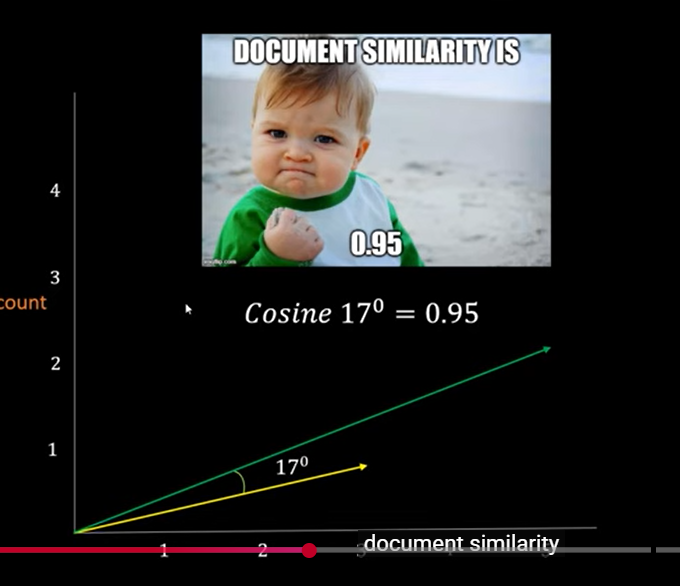

### **Cosine Distanace = 1 - Cosine Similarity**